<a href="https://colab.research.google.com/github/ManasviAtGitHub/pytorch_deep_learning/blob/main/PyTorch_04_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Computer Vision

### Computer vision libraries in PyTorch
* torchvision : base domain library for PyTorch computer vision
* torchvision.datasets : get datasets and data loading functins for computer vision
* torchvision.models - get pretrained computer vision models that you can leverage for your own problems
* torchvision.transforms - functions for manipulation your vision data to be suitable for use with an ML model
* torch.utils.data.Dataset - base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a python iterable over a dataset

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


### Getting dataset

In [3]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = 'data', # where to download data to ?
    train = True, # do we want the training dataset ?
    download = True, # do we want to download yes/no ?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data ?
    target_transform = None # how do we want to transform the labels/targets ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

100%|██████████| 26421880/26421880 [00:01<00:00, 17452336.91it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 288041.11it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5563321.23it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14984231.08it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# check the shape of our image
print(f"Image shape : {image.shape} -> [C, H, W]")
print(f"Image label : {class_names[label]}")

Image shape : torch.Size([1, 28, 28]) -> [C, H, W]
Image label : Ankle boot


Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

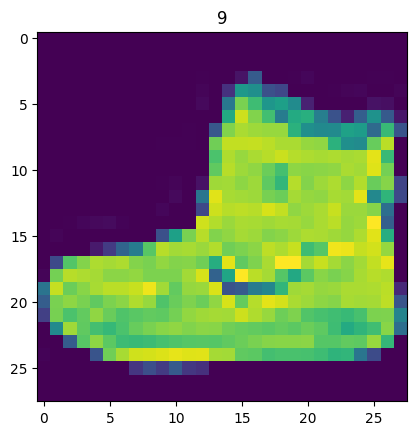

In [10]:
# visualizing our data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

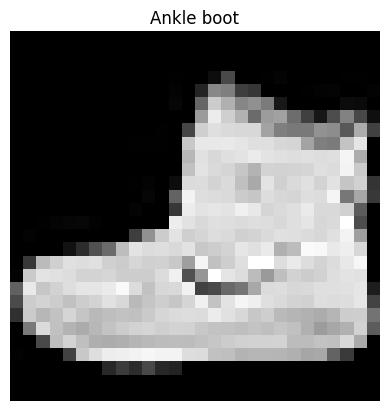

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

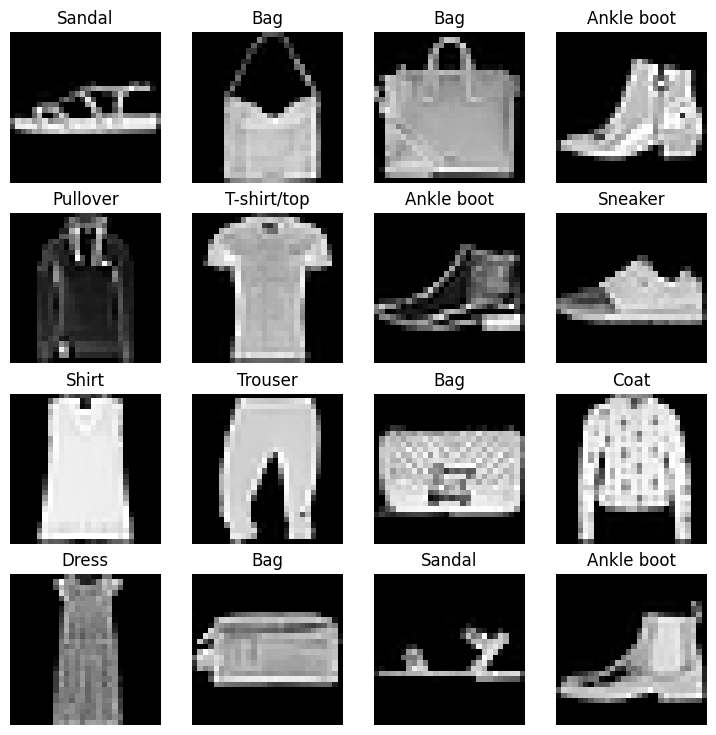

In [12]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare dataloader
Dataloader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini batches).
Why would we do this ?
* It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time(batch size of 32)

* It gives our neural network more chances to update its gradients per epoch

In [14]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle =True)

test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle=False)


# let's check what we have created

print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f8ef2d57f70>, <torch.utils.data.dataloader.DataLoader object at 0x7f8ef2ee9060>)
Length of train_dataloader : 1875 batches of 32 ...
Length of test_dataloader : 313 batches of 32 ...


In [15]:
# check out what's inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 1, label size : torch.Size([])


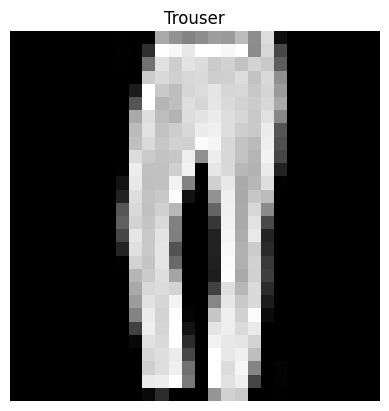

In [16]:
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, label size : {label.shape}")

### Model 0 : Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsquent models/experiments.

In other words : start simply and add complexity when necessary

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform the forward pass

# print what happened
print(f"Shape before flattening : {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening : {output.shape} -> [color_channels, height*width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [19]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28 * 28,
    hidden_units = 10,
    output_shape = len(class_names)
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

Setup, loss, optimizer and evaluation metrics
* Loss function : since we're working with multi-class data, our loss function wil be nn.CrossEntropyLoss()
* Optimizer : our optimizer torch.optim.SGD()
* Evaluation metric : since we're working on a classification problem, let's use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

Create a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
  1. Model's performance (loss and accuracy values etc)
  2. How fast it runs

In [24]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time """
  total_time = end - start
  print(f"Train time on {device} : {total_time : .3f} secs")
  return total_time


In [25]:
start_time = timer()
# some code ..
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu :  0.000 secs


5.1068999994186015e-05

Creating a training loop and training a model on batches of data

* Loop through epochs.
* Loop through training batches, perform training steps, calculate the train loss per batch.
* Loop through testing batches, perform testing steps, calculate the test loss per batch.
* Print out what's happening.
* Time it all(for fun)

Note : Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.

In [26]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n ---- ")
  ### training
  train_loss = 0

  # add a loop to loop through the training batches
  for batch, (X,y) in enumerate (train_dataloader):
    model_0.train()

    # forward pass
    y_pred = model_0(X)

    # calculate losss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accummulate train loss

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # print out what's happening

    if batch%400 == 0:
      print(f"loooked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### testing

  test_loss, test_acc = 0, 0

  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"\n Train loss : {train_loss: .4f} | Test loss : {test_loss:.4f}, Test acc : {test_acc:.4f}")


# calculate training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ---- 
loooked at 0/60000 samples.
loooked at 12800/60000 samples.
loooked at 25600/60000 samples.
loooked at 38400/60000 samples.
loooked at 51200/60000 samples.

 Train loss :  0.5904 | Test loss : 0.5095, Test acc : 82.0387
Epoch : 1
 ---- 
loooked at 0/60000 samples.
loooked at 12800/60000 samples.
loooked at 25600/60000 samples.
loooked at 38400/60000 samples.
loooked at 51200/60000 samples.

 Train loss :  0.4763 | Test loss : 0.4799, Test acc : 83.1969
Epoch : 2
 ---- 
loooked at 0/60000 samples.
loooked at 12800/60000 samples.
loooked at 25600/60000 samples.
loooked at 38400/60000 samples.
loooked at 51200/60000 samples.

 Train loss :  0.4550 | Test loss : 0.4766, Test acc : 83.4265
Train time on cpu :  46.679 secs


### Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):

  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc
          }


In [28]:
# calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Setup device agnostic code

In [29]:
torch.cuda.is_available()

False

In [30]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model 1 : Building a better model with non-linearity

In [31]:
# create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int,
               ):

    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [32]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784, hidden_units=10, output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [33]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

Functions for training and evaluation/ testing loops

In [34]:
# creating function for training and testing loops

def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):

  """ Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # put model into training mode
  model.train()

  # add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    train_loss += loss

    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss : {train_loss:.5f} | Train acc : {train_acc:.2f}%")


In [35]:
def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device
              ):

  """ Performs a testing loop step on model going over data_loader. """

  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:

      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss : {test_loss:.5f} | Test acc {test_acc:.2f}%\n")




In [36]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()


# epochs
epochs = 3

# create a optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n --- ")

  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_1,
            data_loader  = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device
            )


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu, end = train_time_end_on_gpu, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 --- 
Train loss : 1.09199 | Train acc : 61.34%
Test loss : 0.95636 | Test acc 65.00%

Epoch : 1 
 --- 
Train loss : 0.78101 | Train acc : 71.93%
Test loss : 0.72227 | Test acc 73.91%

Epoch : 2 
 --- 
Train loss : 0.67027 | Train acc : 75.94%
Test loss : 0.68500 | Test acc 75.02%

Train time on cpu :  62.736 secs


In [37]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device:device
               ):

  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # make our data device agnostic
      X,y = X.to(device), y.to(device)



      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc
          }


In [38]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device
                             )

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2 : Building Convolutional neural network


In [40]:
# create a convolutional neural network

class FashionMNISTModelV2 (nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """

  def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1
        ),

        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels= hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1
        ),

        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels= hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units * 7 * 7, out_features= output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)

    return x





In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [42]:

# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [43]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epoch = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n ------")
  train_step(
      model = model_2,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )

  test_step(
      model = model_2,
      data_loader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn,
      device = device
  )


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start = train_time_start_model_2,
    end = train_time_end_model_2,
    device = device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ------
Train loss : 0.59518 | Train acc : 78.38%
Test loss : 0.39500 | Test acc 85.99%

Epoch : 1
 ------
Train loss : 0.36536 | Train acc : 86.90%
Test loss : 0.35244 | Test acc 86.91%

Epoch : 2
 ------
Train loss : 0.32588 | Train acc : 88.13%
Test loss : 0.32719 | Test acc 88.07%

Train time on cpu :  252.713 secs


In [44]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## Compare model results aand training time

In [45]:
import pandas as pd
compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [46]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,46.678868
1,FashionMNISTModelV1,0.685001,75.019968,62.735799
2,FashionMNISTModelV2,0.327190,88.069089,252.712579


## Make and evaluate random predictions with best model

In [47]:
def make_predictions(model:torch.nn.Module, data:list, device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())


  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [48]:
import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

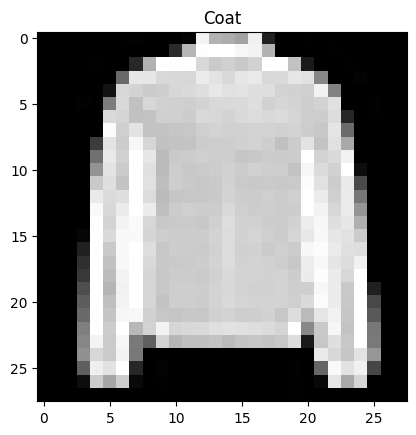

In [49]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [50]:
# make predictions
pred_probs = make_predictions(model = model_2, data = test_samples)

# view first two prediction probabilities
pred_probs[:2]

tensor([[1.7213e-04, 1.7355e-05, 2.8843e-03, 1.0943e-05, 9.1278e-01, 1.0897e-06,
         8.3846e-02, 2.4705e-06, 2.6135e-04, 2.4533e-05],
        [1.3130e-05, 9.6031e-08, 5.1331e-06, 1.9592e-07, 2.3721e-07, 9.9828e-01,
         4.6517e-06, 9.7409e-06, 1.6681e-03, 1.8552e-05]])

In [51]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 5, 4, 0, 2, 6, 1, 4, 1])

In [52]:
test_labels

[4, 5, 4, 0, 2, 0, 1, 6, 1]

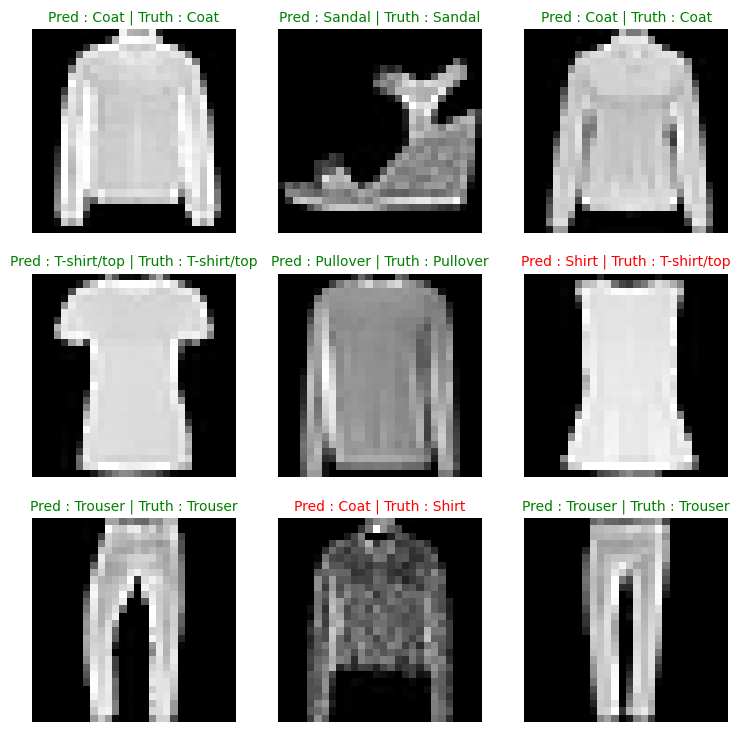

In [53]:
# plot predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred : {pred_label} | Truth : {truth_label}"

  # check for equality between pred and truth and change color of title text

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")

  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## Making a confusion matrix for further prediction evaluation

In [54]:
from tqdm.auto import tqdm

# Make predictions with trained model

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions ..."):

    # send the data and targets to target device
    X, y = X.to(device), y.to(device)

    # do the forward pass
    y_logit = model_2(X)

    # turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into tensor
y_pred_tensor = torch.cat(y_preds)

y_pred_tensor


Making predictions ...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [56]:
len(y_pred_tensor)

10000

In [58]:
!pip install torchmetrics

  Using cached torchmetrics-1.0.1-py3-none-any.whl (729 kB)


In [59]:
!pip install mlxtend

In [60]:
import mlxtend
print(mlxtend.__version__)

0.22.0


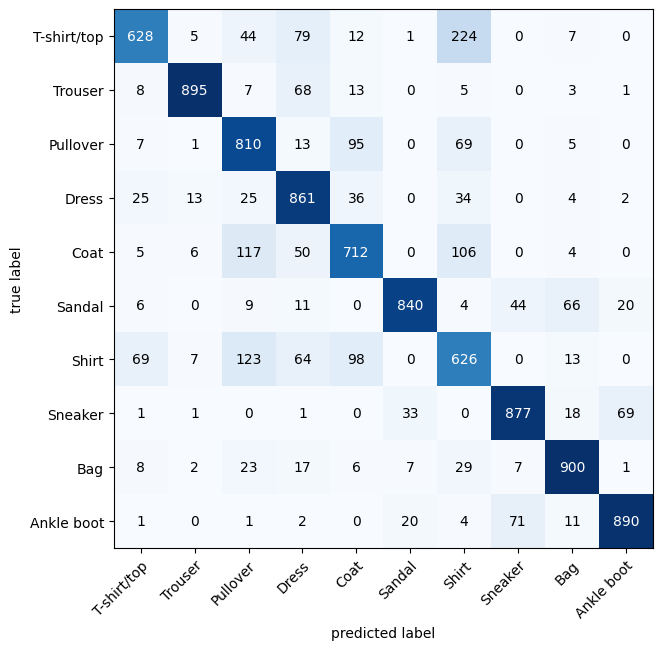

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setup confusion instance and compare predictios to target
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)


## Save and load best performing model

In [64]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# create model save
MODEL_NAME = "cv_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)


Saving model to: models/cv_model.pth


In [65]:
image_shape = [1, 28, 28]

In [66]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [69]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [70]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [71]:
torch.isclose(torch.tensor(model_2_results['model_loss']), torch.tensor(loaded_model_2_results["model_loss"]), atol=1e-02)

tensor(True)